In [213]:
from random import random
import numpy as np
import time
import math
import matplotlib.pyplot as plt

In [10]:
def tsp_read(nodes):
    infile = open(nodes, 'r')
    content = infile.readline().strip().split()
    print("File Name: ", content[2])

    while content[0] != 'NODE_COORD_SECTION':
        if(content[0] == 'DIMENSION'):
            dimension = content[2]
        content = infile.readline().strip().split()
    nodelist = []
    placelist = []
    print('Dimension', dimension)
    N = int(dimension)
    for i in range(0, N):
        x, y, z = infile.readline().strip().split()[:]
        nodelist.append([float(y), float(z)])
        placelist.append(x)
    
    infile.close()
    return nodelist, placelist

In [11]:
def euclidean_distance(nodes, n1, n2):
    distance = math.sqrt((nodes[n1][0]-nodes[n2][0])**2 + (nodes[n1][1]-nodes[n2][1])**2)
    return distance

In [159]:
def cooling_function(T):
    return T * 0.995

In [160]:
def get_path_cost(dist, path):
    cost = 0
    length = len(path)
    for i in range(length):
        cost = cost + dist[path[i], path[(i+1) % length]]
    return cost

In [161]:
def part_reversal(path, i, j):
    while (j > i):
        path[i], path[j] = path[j], path[i]
        i += 1
        j -= 1
    return path

In [210]:
def simulated_annealing(nodes, dist, n):
    # Initial Path
    path = np.random.permutation(n)
    path_cost = get_path_cost(dist, path)
    print("path cost before simulated annealing ", path_cost)
    iteration = 50000
    temperature = 1000
    ran = 0.5
#     print(ran)
    for i in range(iteration):
        rev = np.random.choice(n, size=2)
        newpath = part_reversal(path, min(rev[0], rev[1]), max(rev[0], rev[1]))
        new_pathcost = get_path_cost(dist, newpath)
#         print("new path cost", new_pathcost)
#         print("new path", newpath)
#         print("new path cost", new_pathcost)
        delE = path_cost - new_pathcost
        try:
            prob = 1 / (1 + math.exp(-delE / temperature))
        except OverflowError:
            prob = 0
#         absprint(delE, temperature)
        if delE > 0:
            path = newpath
            path_cost = new_pathcost
        elif ran < prob:
            path = newpath
            path_cost = new_pathcost
#         print(path, path_cost)
#         temperature = cooling_function(temperature)
        temperature = temperature / (i+1)
#         if(temperature < 0.1):
#             temperature = 0.1
    return path, path_cost

In [237]:
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

def graph(nodes, path):
    prev = nodes[0]
    for i in nodes:
        plt.plot(i[0], i[1], 'co-')
        connectpoints(i[0], i[1], prev[0], prev[1])
        prev = i
        
    
#     print(nodes[:][0:])
#     plt.plot(nodes[][0], nodes[:1])

File Name:  Rajasthan
Dimension 20
path cost before simulated annealing  54.95981063799745


/tmp/ipykernel_7090/971839988.py:19: RuntimeWarning: overflow encountered in double_scalars
  prob = 1 / (1 + math.exp(-delE / temperature))
/tmp/ipykernel_7090/971839988.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  prob = 1 / (1 + math.exp(-delE / temperature))


Execution Time: 969504602
Best Path: [ 2 18  1 15  0 17  4  7 16 12 14  8  6  5  3  9 11 19 10 13]
Best Cost: 34.837775636835026


TypeError: 'float' object is not subscriptable

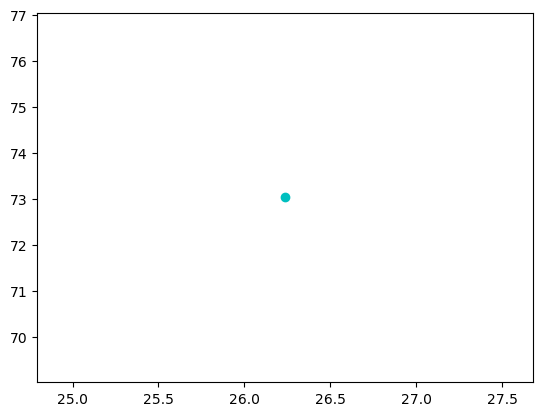

In [238]:
def main():
    # generate_random_coords(100)
    nodes, place = tsp_read("Data/Rajasthan.tsp")
    coords = np.array(nodes) 
    n = len(coords)
    # Distance Array
    dist = np.zeros((n, n), dtype=float)
    
    for i in range(n):
        for j in range(i+1, n):
            dist[i, j] = euclidean_distance(nodes, i, j)
            dist[j, i] = dist[i, j]
    
    start = time.time_ns()
    best_path, best_cost = simulated_annealing(nodes, dist, n)
    end = time.time_ns()
    print('Execution Time:', end-start)
    print('Best Path:', best_path)
    print('Best Cost:', best_cost)
    graph(nodes, best_path)
#     sa.simulated_annealing()
#     sa.display_optimal_path()
#     sa.animateSolutions()
#     sa.plot_learning()


if __name__ == "__main__":
    main()